## O Danych

Zbiór danych zawiera informacje o wyborach prezydenckich w III RP.

Każdy wiersz w zbiorze danych reprezentuje pojedynczego kandydata

Zbiór składa się z 80 rzędów, po 8 kolumn.

Kolumny:
* **ROK** - Rok wyborów
* **IMIE** - Imię kandydata
* **NAZWISKO** - Nazwisko kandydata
* **WYKSZTAŁCENIE** - Wykształcenie kandydata
* **POGLAGY** - Poglądy kandydata według kategorii: Prawica, Centroprawica, Centrum, Centrolewica, Lewica
* **PARTIA** - Partia z której startuje kandydat bądź partia, która popiera kandydata
* **SKRÓT** - Skrót partii w/w
* **I TURA** - Wynik w % I tury
* **II TURA** - Jeśli była to wynik % II tury
* **PREZYDENT** - Czy kandydat został prezydentem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Ogólny przegląd danych

In [32]:
df = pd.read_csv('prezydenci.csv', sep=';', encoding='iso-8859-2', engine='python')
df

,ROK,IMIE,NAZWISKO,WYKSZTACENIE,POGLADY,PARTIA,SKROT,I TURA,II TURA,PREZYDENT
0,1990,Lech,Wałęsa,Zawodowe,Centroprawica,Porozumienie Centrum,PC,"39,96%","74,25%",Tak
1,1990,Stanis÷aw,Tymiski,Wyěsze,Centroprawica,Libertariaska Partia Kanady,NaN,"23,10%","25,75%",Nie
2,1990,Tadeusz,Mazowiecki,Wyěsze,Centrolewica,¨Ruch Obywatelski Akcja Demokratyczna¨,ROAD,"18,08%",Nie,Nie
3,1990,W÷odzimierz,Cimosiewicz,Wyěsze,Lewica,Socjaldemokracja Rzeczpospolitej Polskiej,SdRP,"9,21%",Nie,Nie
4,1990,Roman,Bartoszcze,rednie,Centroprawica,Polskie Stronnictwo Ludowe,PSL,"7,15%",Nie,Nie
...,...,...,...,...,...,...,...,...,...,...
83,2025,Joanna,Senyszyn,Wyěsze,Lewica,Bezpartyjny,NaN,"1,09%",Nie,Nie
84,2025,Marek,Jakubiak,rednie,Centroprawica,Kukiz15,NaN,"0,77%",Nie,Nie
85,2025,Artur,Bartoszewicz,Wyěsze,Centrum,Spo÷eczny Interes,NaN,"0,49%",Nie,Nie
86,2025,Maciej,Maciak,rednie,Lewica,Bezpartyjny,NaN,"0,19%",Nie,Nie


#### Widzimy że plik został wczytany, ale bez polskich znaków, zaraz to zmienię

In [3]:
df = df.replace({
    'ě': 'ż',
    '÷': 'ł',
    '': 'ś',
    '': 'ę',
    '': 'ś',
    'Ž': 'ż',
    '': 'ń',
    'ô': 'ó',
    '': 'ó',
    'ô': 'ę',
}, regex=True)
df

,ROK,IMIE,NAZWISKO,WYKSZTACENIE,POGLADY,PARTIA,SKROT,I TURA,II TURA,PREZYDENT
0,1990,Lech,Wałęsa,Zawodowe,Centroprawica,Porozumienie Centrum,PC,"39,96%","74,25%",Tak
1,1990,Stanisław,Tymiński,Wyższe,Centroprawica,Libertariańska Partia Kanady,NaN,"23,10%","25,75%",Nie
2,1990,Tadeusz,Mazowiecki,Wyższe,Centrolewica,¨Ruch Obywatelski Akcja Demokratyczna¨,ROAD,"18,08%",Nie,Nie
3,1990,Włodzimierz,Cimosiewicz,Wyższe,Lewica,Socjaldemokracja Rzeczpospolitej Polskiej,SdRP,"9,21%",Nie,Nie
4,1990,Roman,Bartoszcze,średnie,Centroprawica,Polskie Stronnictwo Ludowe,PSL,"7,15%",Nie,Nie
...,...,...,...,...,...,...,...,...,...,...
83,2025,Joanna,Senyszyn,Wyższe,Lewica,Bezpartyjny,NaN,"1,09%",Nie,Nie
84,2025,Marek,Jakubiak,średnie,Centroprawica,Kukiz15,NaN,"0,77%",Nie,Nie
85,2025,Artur,Bartoszewicz,Wyższe,Centrum,Społeczny Interes,NaN,"0,49%",Nie,Nie
86,2025,Maciej,Maciak,średnie,Lewica,Bezpartyjny,NaN,"0,19%",Nie,Nie


In [4]:
df.rename(columns={'WYKSZTACENIE': 'WYKSZTAŁCENIE'}, inplace=True)

In [5]:
df.loc[df['NAZWISKO'] == 'Kwaniewski', 'NAZWISKO'] = 'Kwaśniewski'
df.loc[df['PARTIA'] == 'Prawo i Sprawiedliwo', 'PARTIA'] = 'Prawo i Sprawiedliwość'

### 5 losowych wartości

In [6]:
df. sample (5)

,ROK,IMIE,NAZWISKO,WYKSZTAŁCENIE,POGLADY,PARTIA,SKROT,I TURA,II TURA,PREZYDENT
60,2015,Grzegorz,Braun,Wyższe,Prawica,Bezpartyjny,NaN,"0,83%",Nie,Nie
11,1995,Tadeusz,Zieliński,Wyższe,Centrum,Unia Pracy,UP,"3,53%",Nie,Nie
78,2025,Grzegorz,Braun,Wyższe,Prawica,Konfederacja Korony Polskiej,NaN,"6,34%",Nie,Nie
76,2025,Rafał,Trzaskowski,Wyższe,Centrolewica,Platforma Obywatelska,PO,"31,36%","49,11%",Nie
35,2005,Jarosław,Kalinowski,Wyższe,Centrum,Polskie Stronnictwo Ludowe,PSL,"1,80%",Nie,Nie


### 5 pierwszych wartości

In [7]:
df. head (5)

,ROK,IMIE,NAZWISKO,WYKSZTAŁCENIE,POGLADY,PARTIA,SKROT,I TURA,II TURA,PREZYDENT
0,1990,Lech,Wałęsa,Zawodowe,Centroprawica,Porozumienie Centrum,PC,"39,96%","74,25%",Tak
1,1990,Stanisław,Tymiński,Wyższe,Centroprawica,Libertariańska Partia Kanady,NaN,"23,10%","25,75%",Nie
2,1990,Tadeusz,Mazowiecki,Wyższe,Centrolewica,¨Ruch Obywatelski Akcja Demokratyczna¨,ROAD,"18,08%",Nie,Nie
3,1990,Włodzimierz,Cimosiewicz,Wyższe,Lewica,Socjaldemokracja Rzeczpospolitej Polskiej,SdRP,"9,21%",Nie,Nie
4,1990,Roman,Bartoszcze,średnie,Centroprawica,Polskie Stronnictwo Ludowe,PSL,"7,15%",Nie,Nie


### 5 ostatnich wartości

In [8]:
df.tail(5)

,ROK,IMIE,NAZWISKO,WYKSZTAŁCENIE,POGLADY,PARTIA,SKROT,I TURA,II TURA,PREZYDENT
83,2025,Joanna,Senyszyn,Wyższe,Lewica,Bezpartyjny,NaN,"1,09%",Nie,Nie
84,2025,Marek,Jakubiak,średnie,Centroprawica,Kukiz15,NaN,"0,77%",Nie,Nie
85,2025,Artur,Bartoszewicz,Wyższe,Centrum,Społeczny Interes,NaN,"0,49%",Nie,Nie
86,2025,Maciej,Maciak,średnie,Lewica,Bezpartyjny,NaN,"0,19%",Nie,Nie
87,2025,Marek,Woch,Wyższe,Centroprawica,Bezpartyjni Samorzšdowcy,NaN,"0,09%",Nie,Nie


#### Widzimy że większość kandydatów na prezydenta ma wyższe wykształcenie, ich partie w większości przypadków nie mają oficjalnych skrótów

##### Widzimy, że dane są ponumerowane od 0 do 87, więc w latach 1990-2025 w Polsce 88 osób ubiegało się o urząd prezydenta Polski

### Aby potem było prościej w pokazywaniu wykresów, rozbiję kolumnę II TURA na II_TURA_TAK_NIE i II_TURA_PROCENT, a także I TURA zamienię procenty na lczby i nazwę tę kolumnę I TURA (%).

In [9]:
df['I TURA (%)'] = df['I TURA'].str.replace(',', '.').str.replace('%', '').astype(float)

In [10]:
# Kopia oryginalnej kolumny
df['II_TURA_PROCENT'] = df['II TURA'].copy()

# Teraz trzeba zamienić przecinki na kropki, usunąć %, przekształć do float, błędne ("Nie", NaN) zmienią się w NaN
df['II_TURA_PROCENT'] = (
    df['II_TURA_PROCENT']
    .str.replace(',', '.', regex=False)
    .str.replace('%', '', regex=False)
    .apply(lambda x: float(x) if x not in [None, 'Nie', ''] else None)
)

# Dodaję kolumnę logiczną: czy kandydat był w II turze?
df['II_TURA_TAK_NIE'] = df['II TURA'].apply(lambda x: x != 'Nie' and pd.notnull(x))

In [11]:
# Ilu kandydatów było w II turze?
df['II_TURA_TAK_NIE'].value_counts()

# Średni wynik w II turze
df['II_TURA_PROCENT'].mean()

# Posortowane po najlepszym wyniku w II turze
df.sort_values(by='II_TURA_PROCENT', ascending=False).head()

,ROK,IMIE,NAZWISKO,WYKSZTAŁCENIE,POGLADY,PARTIA,SKROT,I TURA,II TURA,PREZYDENT,I TURA (%),II_TURA_PROCENT,II_TURA_TAK_NIE
0,1990,Lech,Wałęsa,Zawodowe,Centroprawica,Porozumienie Centrum,PC,"39,96%","74,25%",Tak,39.96,74.25,True
31,2005,Lech,Kaczyński,Wyższe,Centroprawica,Prawo i Sprawiedliwość,PIS,"33,10%",54.04%,Tak,33.10,54.04,True
43,2010,Bronisław,Komorowski,Wyższe,Centrolewica,Platforma Obywatelska,PO,"41,54%","53,01%",Tak,41.54,53.01,True
6,1995,Aleksander,Kwaśniewski,średnie,Centrolewica,Socjaldemokracja Rzeczpospolitej Polskiej,SdRP,"35,11%","51,72%",Tak,35.11,51.72,True
53,2015,Andrzej,Duda,Wyższe,Centroprawica,Prawo i Sprawiedliwość,PIS,"34,76%","51,55%",Tak,34.76,51.55,True


##### Na tle wszystkich kandydatów wyróżnia się Lech Wałęsa który w roku 1990 w drugiej turze zdobył 74.25% głosów

### Widzimy że kolumny I TURA i II TURA są nie potrzebne więc je usuwamy i zmienimy kolejność kolumn

In [12]:
df = df.drop(columns=['I TURA', 'II TURA'])

In [13]:
# Zmieńmy kolejność kolumn
df = df[['ROK','IMIE', 'NAZWISKO', 'WYKSZTAŁCENIE', 'POGLADY', 'PARTIA', 'SKROT', 'I TURA (%)', 'II_TURA_TAK_NIE', 'II_TURA_PROCENT', 'PREZYDENT']]

# Zmieńmy w kolumnie II_TURA_PROCENT wartość NaN na 'Nie dotyczy"
df.loc[df['II_TURA_TAK_NIE'] == False, 'II_TURA_PROCENT'] = 'Nie dotyczy'

# Jeśłi kolumna SKROT jest pusta do zostawmy "-"
df['SKROT'] = df['SKROT'].fillna('-')

# Zamieńmy w kolumnie II_TURA_TAK_NIE True na Tak, a False na Nie
df['II_TURA_TAK_NIE'] = df['II_TURA_TAK_NIE'].map({True: 'Tak', False: 'Nie'})
df

,ROK,IMIE,NAZWISKO,WYKSZTAŁCENIE,POGLADY,PARTIA,SKROT,I TURA (%),II_TURA_TAK_NIE,II_TURA_PROCENT,PREZYDENT
0,1990,Lech,Wałęsa,Zawodowe,Centroprawica,Porozumienie Centrum,PC,39.96,Tak,74.25,Tak
1,1990,Stanisław,Tymiński,Wyższe,Centroprawica,Libertariańska Partia Kanady,-,23.10,Tak,25.75,Nie
2,1990,Tadeusz,Mazowiecki,Wyższe,Centrolewica,¨Ruch Obywatelski Akcja Demokratyczna¨,ROAD,18.08,Nie,Nie dotyczy,Nie
3,1990,Włodzimierz,Cimosiewicz,Wyższe,Lewica,Socjaldemokracja Rzeczpospolitej Polskiej,SdRP,9.21,Nie,Nie dotyczy,Nie
4,1990,Roman,Bartoszcze,średnie,Centroprawica,Polskie Stronnictwo Ludowe,PSL,7.15,Nie,Nie dotyczy,Nie
...,...,...,...,...,...,...,...,...,...,...,...
83,2025,Joanna,Senyszyn,Wyższe,Lewica,Bezpartyjny,-,1.09,Nie,Nie dotyczy,Nie
84,2025,Marek,Jakubiak,średnie,Centroprawica,Kukiz15,-,0.77,Nie,Nie dotyczy,Nie
85,2025,Artur,Bartoszewicz,Wyższe,Centrum,Społeczny Interes,-,0.49,Nie,Nie dotyczy,Nie
86,2025,Maciej,Maciak,średnie,Lewica,Bezpartyjny,-,0.19,Nie,Nie dotyczy,Nie


### Przyjrzyjmy się ogólnym informacjom o Date Frame

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ROK              88 non-null     int64  
 1   IMIE             88 non-null     object 
 2   NAZWISKO         88 non-null     object 
 3   WYKSZTAŁCENIE    88 non-null     object 
 4   POGLADY          88 non-null     object 
 5   PARTIA           88 non-null     object 
 6   SKROT            88 non-null     object 
 7   I TURA (%)       88 non-null     float64
 8   II_TURA_TAK_NIE  88 non-null     object 
 9   II_TURA_PROCENT  88 non-null     object 
 10  PREZYDENT        88 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 7.7+ KB


# Analiza brakujących wartości

In [15]:
df.isnull().sum()

ROK                0
IMIE               0
NAZWISKO           0
WYKSZTAŁCENIE      0
POGLADY            0
PARTIA             0
SKROT              0
I TURA (%)         0
II_TURA_TAK_NIE    0
II_TURA_PROCENT    0
PREZYDENT          0
dtype: int64

##### Nie ma brakujących wartości

# Analiza pojedynczych zmiennych

In [16]:
df['ROK'].min(), df['ROK'].max()

(1990, 2025)

##### Jak widać pierwszym rokiem badania jest 1990, a ostatnim 2025

In [17]:
df['IMIE'].value_counts().head()

Andrzej    6
Janusz     6
Marek      5
Lech       3
Jan        3
Name: IMIE, dtype: int64

##### Najczęściej występujące imię wśród kandydatów na prezydenta to Andrzej i Janusz (6 razy)

In [18]:
df['NAZWISKO'].value_counts().head()

Korwin-Mikke    5
Lepper          4
Olechowski      2
Kalinowski      2
Trzaskowski     2
Name: NAZWISKO, dtype: int64

##### Najczęstszde nazwisko to Korwin-Mikke występuje aż 5 razy

In [19]:
df['WYKSZTAŁCENIE'].value_counts(dropna=False)

Wyższe        63
średnie       16
Zawodowe       8
Podstawowe     1
Name: WYKSZTAŁCENIE, dtype: int64

##### Kandydaci mają najczęściej wyższe wykształcenie

In [20]:
df['PARTIA'].value_counts(dropna=False).head()

Bezpartyjny                   12
Polskie Stronnictwo Ludowe     7
Platforma Obywatelska          5
Prawo i Sprawiedliwość         5
Przymierze Samoobrona          4
Name: PARTIA, dtype: int64

##### Najwięcej bo aż 12 kandydatów nie przynależało do żadnej partii

In [21]:
df['POGLADY'].value_counts(dropna=False)

Prawica          25
Centroprawica    19
Lewica           15
Centrum          15
Centrolewica     14
Name: POGLADY, dtype: int64

##### Najwięcej kandydatów bo aż 25 miało poglądy prawicowe

### Porównajmy stosunek głosów zwycięzców II tury wyborów z ich wynikami w I turze

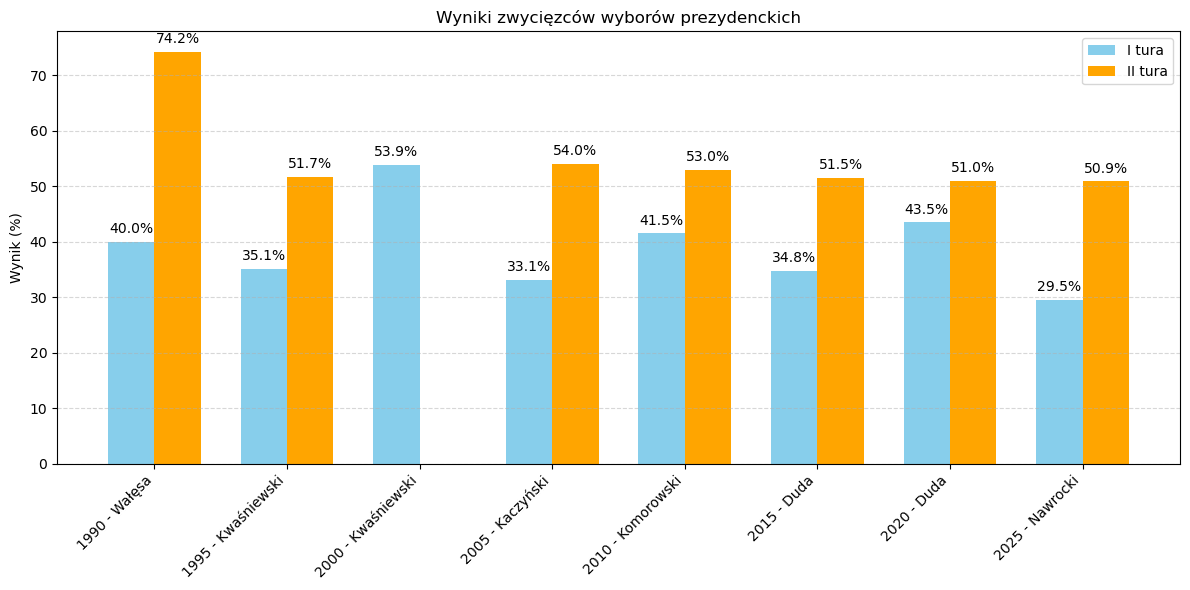

In [22]:
# Konwersja wyników I i II tury na liczby zmiennoprzecinkowe
df['I TURA (%)'] = pd.to_numeric(df['I TURA (%)'], errors='coerce')
df['II_TURA_PROCENT'] = pd.to_numeric(df['II_TURA_PROCENT'], errors='coerce')

# Filtrujemy zwycięzców
zwyciezcy = df[(df['PREZYDENT'] == 'Tak')].copy()
zwyciezcy['ETYKIETA'] = zwyciezcy['ROK'].astype(str) + ' - ' + zwyciezcy['NAZWISKO']

# Dane do wykresu
x = np.arange(len(zwyciezcy))
width = 0.35

# Wykres
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, zwyciezcy['I TURA (%)'], width, label='I tura', color='skyblue')
bars2 = ax.bar(x + width/2, zwyciezcy['II_TURA_PROCENT'].fillna(0), width, label='II tura', color='orange')

# Etykiety
ax.set_ylabel('Wynik (%)')
ax.set_title('Wyniki zwycięzców wyborów prezydenckich')
ax.set_xticks(x)
ax.set_xticklabels(zwyciezcy['ETYKIETA'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Etykiety liczby nad słupkami
for i, bar in enumerate(bars1):
    yval = bar.get_height()
    if not np.isnan(yval):
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

for i, bar in enumerate(bars2):
    yval = zwyciezcy.iloc[i]['II_TURA_PROCENT']
    if not pd.isna(yval) and yval > 0:
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### W pierwszej turze najwięcej głosów miał A. Kwaśniewski w 2000 roku, wygrywając wybory w pierwszej turze. Widzimy także że najwięcej głosów w II  turze otrzymał L. Wałęsa (74,2%), a najniższe poparcie w I turze miał L. Kaczyński w 2005 roku, ale w II turze już miał II najlepszy wynik (54%). Można zauważyć, że w większości przypadków, w II turze wygrywało się tylko kilkoma procentami przewagi.

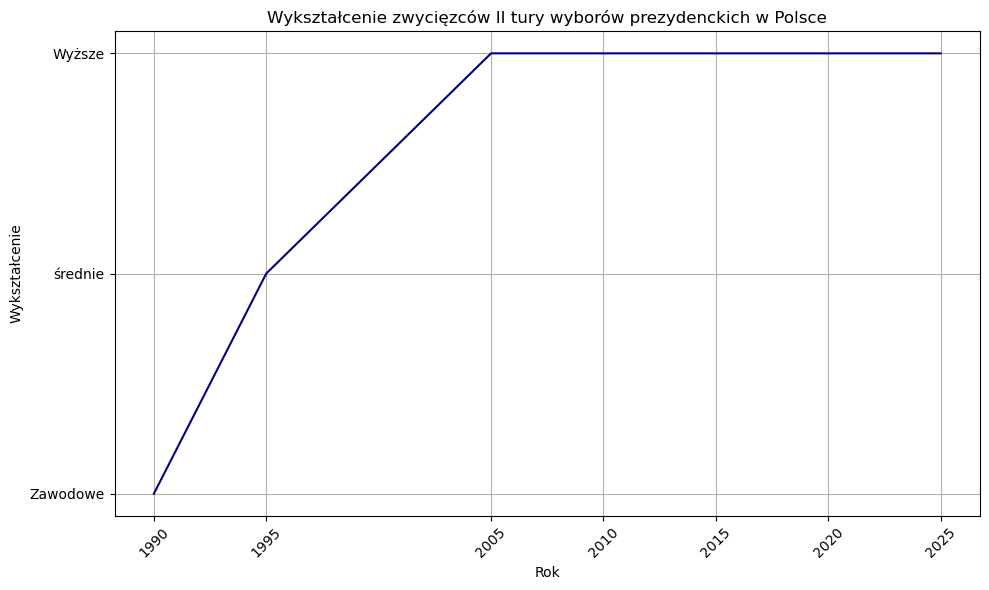

In [23]:
# Filtrowanie zwycięzców II tury
zwyciezcy_ii_tury = df[(df['II_TURA_TAK_NIE'] == 'Tak') & (df['PREZYDENT'] == 'Tak')]

# Tworzenie wykresu: oś X - rok, oś Y - wykształcenie
plt.figure(figsize=(10, 6))
plt.plot(zwyciezcy_ii_tury['ROK'], zwyciezcy_ii_tury['WYKSZTAŁCENIE'], color='navy')

# Opis osi i tytuł
plt.title('Wykształcenie zwycięzców II tury wyborów prezydenckich w Polsce')
plt.xlabel('Rok')
plt.ylabel('Wykształcenie')
plt.grid(True)
plt.xticks(zwyciezcy_ii_tury['ROK'].unique(), rotation=45)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

##### Większość prezydentów III RP miała wyższe wykształcenie

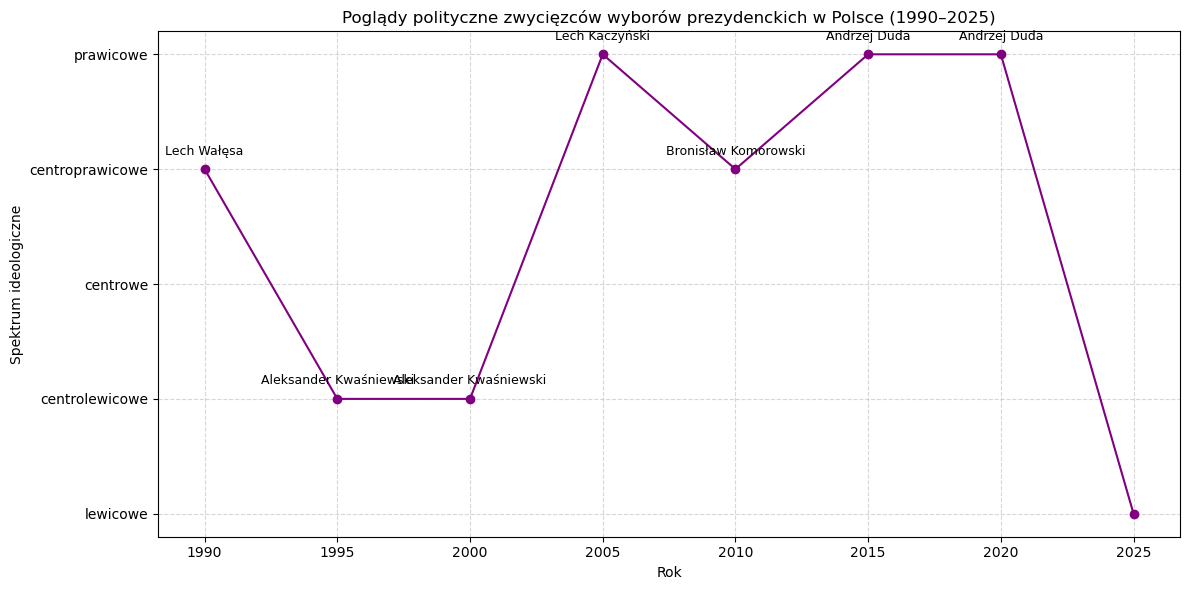

In [24]:
# Dane
lata = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
zwyciezcy = [
    "Lech Wałęsa", "Aleksander Kwaśniewski", "Aleksander Kwaśniewski",
    "Lech Kaczyński", "Bronisław Komorowski", "Andrzej Duda",
    "Andrzej Duda"
]
poglady = [
    3, 1, 1, 4, 3, 4, 4, 0  # liczby odpowiadające ideologicznemu spektrum
]
etykiety_pogladow = ['lewicowe', 'centrolewicowe', 'centrowe', 'centroprawicowe', 'prawicowe']

# Wykres
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(lata, poglady, marker='o', linestyle='-', color='purple')

# Opisy punktów
for i, nazwisko in enumerate(zwyciezcy):
    ax.text(lata[i], poglady[i] + 0.1, nazwisko, ha='center', va='bottom', fontsize=9)

# Oś Y - poglądy
ax.set_yticks(range(5))
ax.set_yticklabels(etykiety_pogladow)

# Etykiety
ax.set_title("Poglądy polityczne zwycięzców wyborów prezydenckich w Polsce (1990–2025)")
ax.set_xlabel("Rok")
ax.set_ylabel("Spektrum ideologiczne")
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

##### Większość prezydentów III RP miała poglądy prawicowe/centroprawicowe. 

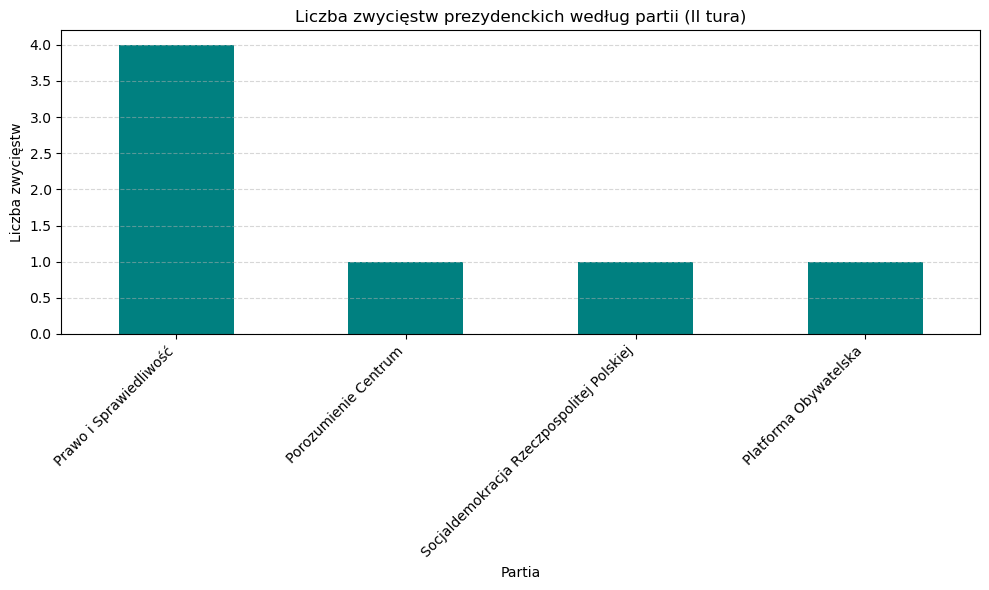

In [25]:
# Zliczenie liczby zwycięstw dla każdej partii
partie_counts = zwyciezcy_ii_tury['PARTIA'].value_counts()

# Wykres słupkowy
plt.figure(figsize=(10, 6))
partie_counts.plot(kind='bar', color='teal')

# Opis osi i tytuł
plt.title('Liczba zwycięstw prezydenckich według partii (II tura)')
plt.xlabel('Partia')
plt.ylabel('Liczba zwycięstw')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

#### Zdecydowanie najwięcej prezydentur było z Prawa i Sprawiedliwości (3)

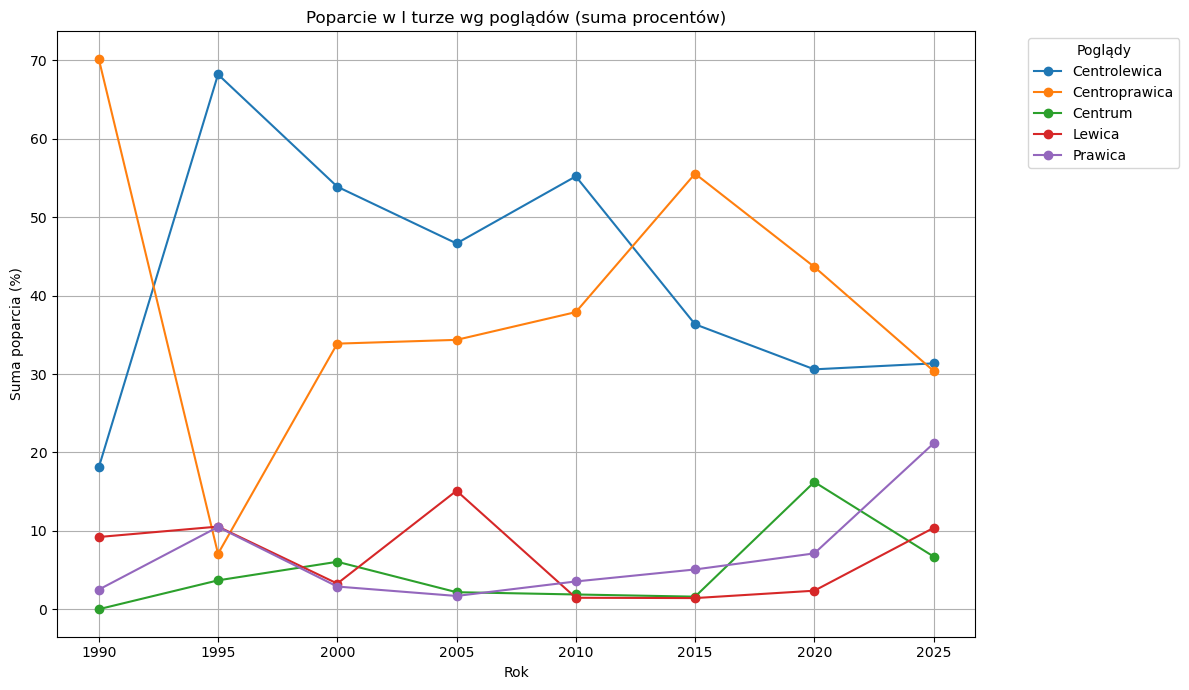

In [26]:
# Grupowanie sumy poparcia w I turze wg roku i poglądów
grouped = df.groupby(["ROK", "POGLADY"])["I TURA (%)"].sum().unstack().fillna(0)

# Rysowanie wykresu
plt.figure(figsize=(12, 7))

for ideology in grouped.columns:
    plt.plot(grouped.index, grouped[ideology], marker='o', label=ideology)

plt.title("Poparcie w I turze wg poglądów (suma procentów)")
plt.xlabel("Rok")
plt.ylabel("Suma poparcia (%)")
plt.legend(title="Poglądy", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Wyraźnie widać że najwyższe poparcie do 2012 miała centrolewica, a od 2012 centroprawica. Widać też że od 2005 roku prawica zyskuje coraz więcej poparcia. Największe poparcie bo aż 70% miała centroprawica w 1990 roku, aby 5 lat później mieć najmniejsze (8%). Za to centrolewica najniższe wyniki miała w 1990 roku (18%), ale 5 lat później mieć rekordowe 68%. Na wykresach widać też bardzo duży skok lewicy w 2005 roku (15%), a także centrum w 2020 na 16%.

# Sprawdzanie korelacji między zmiennymi

Macierz korelacji (Pearsona):
                   WYKSZTALCENIE_NUM  POGLADY_NUM  I TURA (%)  II_TURA_PROCENT
WYKSZTALCENIE_NUM           1.000000     0.088761   -0.023231        -0.495695
POGLADY_NUM                 0.088761     1.000000   -0.149619         0.064006
I TURA (%)                 -0.023231    -0.149619    1.000000         0.643676
II_TURA_PROCENT            -0.495695     0.064006    0.643676         1.000000


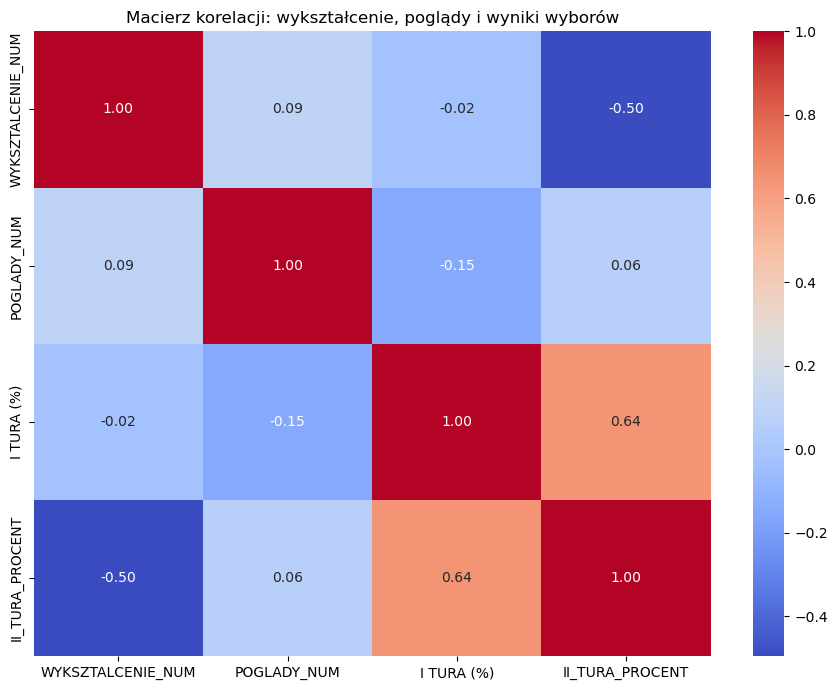

In [27]:
# Mapowanie wykształcenia na liczby
wyksztalcenie_map = {
    'Podstawowe': 0,
    'Zawodowe': 1,
    'średnie': 2,
    'Średnie': 2,
    'Wyższe': 3
}

# Mapowanie poglądów na liczby (Lewica = -2 → Prawica = 2)
poglad_map = {
    'Lewica': -2,
    'Centrolewica': -1,
    'Centrum': 0,
    'Centroprawica': 1,
    'Prawica': 2
}

# Zakładam, że df to Twój DataFrame
df['WYKSZTALCENIE_NUM'] = df['WYKSZTAŁCENIE'].map(wyksztalcenie_map)
df['POGLADY_NUM'] = df['POGLADY'].map(poglad_map)

# Konwersja kolumn procentowych na float
df['I TURA (%)'] = pd.to_numeric(df['I TURA (%)'], errors='coerce')
df['II_TURA_PROCENT'] = pd.to_numeric(df['II_TURA_PROCENT'], errors='coerce')

# Wybór kolumn do korelacji
kolumny_do_korelacji = ['WYKSZTALCENIE_NUM', 'POGLADY_NUM', 'I TURA (%)', 'II_TURA_PROCENT']

# Obliczamy macierz korelacji
macierz_korelacji = df[kolumny_do_korelacji].corr(method='pearson')

# Wyświetlamy macierz korelacji
print("Macierz korelacji (Pearsona):")
print(macierz_korelacji)

# Wizualizacja macierzy korelacji
plt.figure(figsize=(9, 7))
sns.heatmap(macierz_korelacji, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji: wykształcenie, poglądy i wyniki wyborów')
plt.tight_layout()
plt.show()

### Widać wyraźną korelację między zwycięstwem w I turze, a zwycięstwem w II turze, co ciekawe im mniej wykształcony kandydat tym zdobywał więcej głosów w II turze mimo, że wykształcenie nie ma wpływu na głosy oddane w I turze. Poglądy nie mają większego znaczenia w wyborach ani w I turze ani w II turze. 

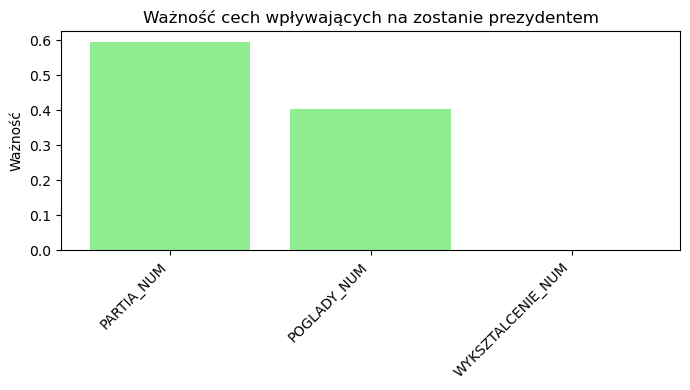

In [30]:
# Mapujemy WYKSZTAŁCENIE na liczby (jeśli jeszcze nie było)
wyksztalcenie_map = {
    'Podstawowe': 0, 'Zawodowe': 1, 'średnie': 2, 'Średnie': 2, 'Wyższe': 3
}
df['WYKSZTALCENIE_NUM'] = df['WYKSZTAŁCENIE'].map(wyksztalcenie_map)

# Kodujemy POGLADY i PARTIA za pomocą LabelEncoder
le_poglady = LabelEncoder()
df['POGLADY_NUM'] = le_poglady.fit_transform(df['POGLADY'].astype(str))

le_partia = LabelEncoder()
df['PARTIA_NUM'] = le_partia.fit_transform(df['PARTIA'].astype(str))

# Tworzymy zmienną celu: czy został prezydentem (Tak=1, Nie=0)
df['WYGRAL'] = df['PREZYDENT'].apply(lambda x: 1 if x == 'Tak' else 0)

# Wybieramy cechy i usuwamy wiersze z brakami
X = df[['POGLADY_NUM', 'PARTIA_NUM', 'WYKSZTALCENIE_NUM']].dropna()
y = df.loc[X.index, 'WYGRAL']

# Podział na train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trenujemy drzewo decyzyjne
model_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree.fit(X_train, y_train)

# Wyświetlamy ważność cech
importances = model_tree.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(7,4))
plt.title("Ważność cech wpływających na zostanie prezydentem")
plt.bar(range(len(importances)), importances[indices], color='lightgreen', align='center')
plt.xticks(range(len(importances)), features[indices], rotation=45, ha='right')
plt.ylabel("Ważność")
plt.tight_layout()
plt.show()

### Na wykresie widać, że ważniejsze od poglądów jest posiadane wykształcenie. Ale najważniejszą cechą prezydentów III RP jest przynależność do partii politycznej

In [36]:
!jupyter nbconvert Prezydenci.ipynb --to html --no-input --no-prompt --output Prezydenci.html

[NbConvertApp] Converting notebook Prezydenci.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 850880 bytes to Prezydenci1.html
